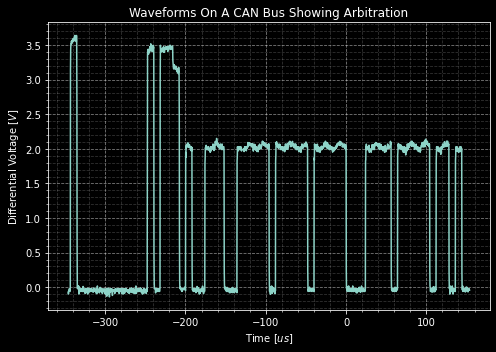

In [42]:
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

file_path = Path('scope-data.csv')

time_s = []
voltage_V = []
with file_path.open() as file:
    csv_data = csv.reader(file)

    for idx, line in enumerate(csv_data):
        # Skip over
        # ['x-axis', '1']
        # ['second', 'Volt']
        if idx < 2:
            continue
        time_s.append(float(line[0]))
        voltage_V.append(float(line[1]))
time_s = np.array(time_s)
voltage_V = np.array(voltage_V)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(time_s*1e6, voltage_V)
ax.grid(alpha=0.5, which='major', linestyle='--')
ax.grid(alpha=0.2, which='minor', linestyle='--')
ax.set_xlabel('Time [$us$]')
ax.set_ylabel('Differential Voltage [$V$]');
ax.set_title('Waveforms On A CAN Bus Showing Arbitration', size=12)
plt.tight_layout()
plt.minorticks_on()
plt.savefig('waveform-full.png', dpi=150)

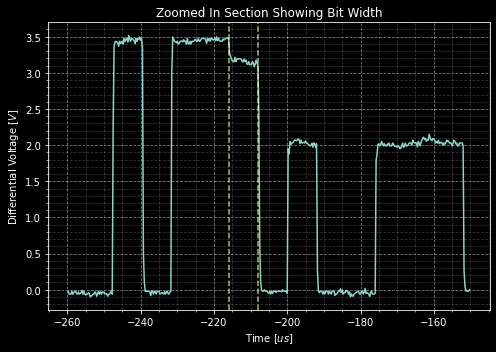

In [44]:
filter_arr = np.logical_and(time_s > -260e-6, time_s < -150e-6)

filtered_time_s = time_s[filter_arr]
filtered_voltage_V = voltage_V[filter_arr]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(filtered_time_s*1e6, filtered_voltage_V)
ax.axvline(-216, ls='--', color='C1', alpha=0.7)
ax.axvline(-208, ls='--', color='C1', alpha=0.7)
ax.grid(alpha=0.5, which='major', linestyle='--')
ax.grid(alpha=0.2, which='minor', linestyle='--')
ax.set_xlabel('Time [$us$]')
ax.set_ylabel('Differential Voltage [$V$]')
ax.set_title('Zoomed In Section Showing Bit Width', size=12)
plt.tight_layout()
plt.minorticks_on()
plt.savefig('waveform-zoomed-in.png', dpi=150)